

# 项目：测试一种感知现象

<a id='intro'></a>
## 简介
<ul>
<li>在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。</li>
</ul>

### 对数据进行分析

In [1]:
import pandas as pd
import numpy as np
import seaborn as pandas
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipykernel import kernelapp as app
%matplotlib inline

In [2]:
#加载csv文件
df = pd.read_csv('stroopdata.csv')
df.head() #查看前5列

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [26]:
df.shape

(24, 2)

### 问题1：确认试验中的变量

一个自（分组）变量：试验中的一致性试验和非一致性试验。与一个因变量：测量出来的每个样本两次试验的结果。根据自变量的特定值，比较各组中因变量的均值。用t检验比较数据试验结果的均值。

### 问题2：建立假设

这里u0为总体一致性试验的均值，u1则为总体非一致性试验的均值，本检验用两个总体的均值存在差异来进行假设，从而证明这一心理学感知现象的存在。

零假设H0:  u0 = u1

对立假设H1: u0 ！= u1

### 问题3：报告描述性统计分析
为数据集组计算了描述性统计分析，包括至少一项中心性测量和一项可变性测量。

中心性测量选择使用数据均值，分别计算一致性试验和非一致性试验的均值

可变性测量选择使用数据标准差，分别计算一致性试验和非一致性试验的标准差

In [22]:
df['Congruent'].mean()

14.051125000000004

In [23]:
df['Incongruent'].mean()

22.01591666666667

In [24]:
df['Congruent'].std()

3.559357957645195

In [25]:
df['Incongruent'].std()

4.797057122469138

结论：

1、从样本数据中测算出非一致性试验的均值大于非一致性试验的均值，证明在样本中两组试验所需要的时间确实存在差异。

2、从样本数据中测算出非一致性试验的标准差大于非一致性试验的标准差，证明在样本中两组试验所需要的时间相对于均值非一致性试验需要更多的时间。

### 问题4：绘制数据图

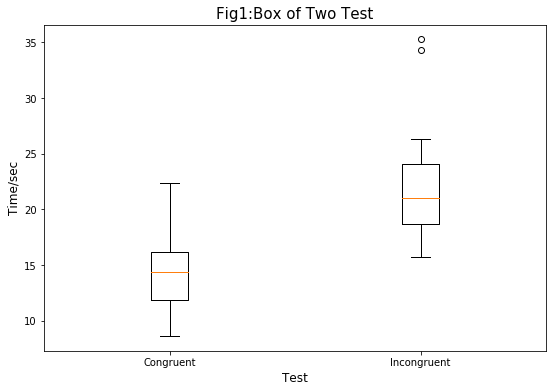

In [21]:
fig = plt.figure(figsize=(9, 6))  # 创建画布
ax = plt.subplot()  # 创建作图区域
# 蓝色矩形的红线：50%分位点是4.5,上边沿：25%分位点是2.25,下边沿：75%分位点是6.75
labels = ['Congruent', 'Incongruent']
ax.boxplot([df['Congruent'], df['Incongruent']],labels =labels)
plt.title('Fig1:Box of Two Test',fontsize=15)  
plt.xlabel('Test',fontsize=12)  
plt.ylabel('Time/sec',fontsize=12)   
plt.show() 

从Fig1的箱线图中可以看出非一致性试验的中位数、四分位值和边界都高于一致性试验的中位数、四分位值和边界。得出样本非一致性的试验时间高于一致性试验的时间，接下来要去判断总体这一现象是否存在。

### 问题5：执行统计检验并解读结果

使用t检验的先决条件：主要用于样本含量较小（例如n<30），总体标准差σ未知的正态分布。

此样本量n=24,我们假设这个样本符合正态分布，且此样本的总体标准差σ未知，所以我们可以选择t检验。

此样本的每一对数值都是同一个个体利用两种类别的试验测试出成对的结果，本数据要判断的是非一致性试验与一致性试验的差异，每个个体本身存在的差异可以忽略不记。

t检验的方式有很多种，检验相关或配对观测值之差的均值是否等于目标值是本试验需要的，所以选择配对 t检验

选择配对 t检验

这里的置信水平没有过多的要求，定在95%，α为0.05

利用上面的前提去运作配对 t检验

In [3]:
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

α= 0.05 

v = n-1 = 24-1 = 23 （v为自由度）

t = 2.069或者-2.069（利用α和v，查表得到t值）

T = -8.0207

T<t （此时利用t为负值的那边去判断）

从输出结果查看t检验的p值，是否达到显著水平。

pvalue = 4.10e-08

pvalue < 0.05

是，接受H1。一致性试验均值结果与非一致性试验结果不同，存在差异。

注来源：

1、https://blog.csdn.net/m0_37777649/article/details/74938120

2、https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/tests-of-means/types-of-t-tests/

3、https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P1/%E7%8B%AC%E7%AB%8B%E5%92%8C%E7%9B%B8%E4%BE%9D%E6%A0%B7%E6%9C%AC%E5%8C%BA%E5%88%AB.pdf

https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md

https://baike.baidu.com/item/t%E6%A3%80%E9%AA%8C#2

https://wapbaike.baidu.com/item/t%E6%A3%80%E9%AA%8C/9910799?fr=aladdin&bk_tashuoStyle=topLeft&bk_share=qqbrowser&bk_sharefr=lemma&sc_id=WOoF1nC

